In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import plot_importance
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

In [2]:
data_x = pd.read_csv("x_under_cvd_death.csv")

In [3]:
data_x

,Unnamed: 0,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,...,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,0,0.84857,0.14571,0.197140,0.23232,0.29143,0.55714,0.52308,0.17172,0.16286,...,0,0,0,1,0,0,0,1,1,0
1,1,0.71566,0.18795,0.180720,0.25253,0.29639,0.41928,0.70690,0.26263,0.21687,...,0,1,1,0,0,0,0,1,1,0
2,2,0.69070,0.23023,0.167440,0.24242,0.31395,0.37674,0.83333,0.33333,0.34884,...,0,1,0,1,0,0,0,1,1,0
3,3,0.78158,0.23684,0.126320,0.16162,0.32368,0.45789,0.70690,0.30303,0.21316,...,0,0,1,0,0,0,0,1,0,1
4,4,0.67500,0.26591,0.095455,0.14141,0.27955,0.39545,0.70690,0.39394,0.22500,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,931,1.10000,0.20000,0.266670,0.24242,0.40000,0.70000,0.57143,0.18182,0.27778,...,0,1,0,1,0,0,0,1,0,1
932,932,0.82500,0.16667,0.158330,0.19192,0.29167,0.53333,0.54688,0.20202,0.15833,...,0,0,0,1,0,0,0,1,0,1
933,933,0.80270,0.21892,0.162160,0.20202,0.33243,0.47027,0.70690,0.27273,0.19459,...,0,0,0,1,0,1,0,0,0,1
934,934,0.90000,0.17273,0.200000,0.22222,0.31818,0.58182,0.54688,0.19192,0.20000,...,0,1,0,1,0,0,0,1,1,0


In [13]:
data_pw_crf = data_x.iloc[:, 1:65]

In [14]:
data_pw_crf.head()

,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,t_p2in_dia,...,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,0.84857,0.14571,0.197140,0.23232,0.29143,0.55714,0.52308,0.17172,0.16286,0.14571,...,0,0,0,1,0,0,0,1,1,0
1,0.71566,0.18795,0.180720,0.25253,0.29639,0.41928,0.70690,0.26263,0.21687,0.18072,...,0,1,1,0,0,0,0,1,1,0
2,0.69070,0.23023,0.167440,0.24242,0.31395,0.37674,0.83333,0.33333,0.34884,0.23023,...,0,1,0,1,0,0,0,1,1,0
3,0.78158,0.23684,0.126320,0.16162,0.32368,0.45789,0.70690,0.30303,0.21316,0.15000,...,0,0,1,0,0,0,0,1,0,1
4,0.67500,0.26591,0.095455,0.14141,0.27955,0.39545,0.70690,0.39394,0.22500,0.16364,...,0,0,1,0,0,0,0,1,1,0


In [15]:
data_pw_crf.shape

(936, 64)

In [16]:
data_pw_crf.size

59904

In [17]:
X = data_pw_crf.values

In [18]:
X

array([[0.84857, 0.14571, 0.19714, ..., 1.     , 1.     , 0.     ],
       [0.71566, 0.18795, 0.18072, ..., 1.     , 1.     , 0.     ],
       [0.6907 , 0.23023, 0.16744, ..., 1.     , 1.     , 0.     ],
       ...,
       [0.8027 , 0.21892, 0.16216, ..., 0.     , 0.     , 1.     ],
       [0.9    , 0.17273, 0.2    , ..., 1.     , 1.     , 0.     ],
       [0.84857, 0.13714, 0.22286, ..., 1.     , 0.     , 1.     ]])

In [19]:
X.size

59904

In [20]:
X.shape

(936, 64)

In [21]:
# reading the output variable

In [22]:
data_y = pd.read_csv("y_under_cvd_death.csv")

In [23]:
data_y = data_y.drop(['Unnamed: 0'], axis=1)

In [24]:
data_y

,cvd_death
0,0
1,0
2,0
3,0
4,0
...,...
931,1
932,1
933,1
934,1


In [25]:
y = data_y.values

In [26]:
y.size

936

In [27]:
# nested cv

In [28]:
cv_outer = KFold(n_splits=3, shuffle=True, random_state=42)

best_auc = []
predict_prob = []
feature_imp = []

best auc score is : 
0.7600114797786786
[[0.5240475  0.47595254]
 [0.2353468  0.7646532 ]
 [0.9159578  0.08404222]
 [0.89333874 0.10666126]
 [0.28232855 0.71767145]
 [0.8280283  0.17197168]
 [0.6049118  0.39508823]
 [0.7036296  0.29637042]
 [0.5607302  0.43926975]
 [0.85822695 0.14177306]
 [0.66004336 0.33995667]
 [0.18786544 0.81213456]
 [0.5315782  0.46842185]
 [0.93472886 0.06527113]
 [0.5989181  0.40108195]
 [0.6703319  0.3296681 ]
 [0.49961853 0.50038147]
 [0.10828638 0.8917136 ]
 [0.6591333  0.34086668]
 [0.6547004  0.34529957]
 [0.704028   0.29597202]
 [0.9242089  0.0757911 ]
 [0.7049267  0.29507327]
 [0.48572117 0.5142788 ]
 [0.2951433  0.7048567 ]
 [0.5606872  0.43931282]
 [0.8121235  0.18787654]
 [0.65099525 0.34900478]
 [0.65951395 0.34048602]
 [0.28838503 0.71161497]
 [0.33761793 0.66238207]
 [0.5140734  0.48592663]
 [0.7885274  0.21147259]
 [0.90485555 0.09514444]
 [0.47370344 0.52629656]
 [0.5222219  0.4777781 ]
 [0.5108064  0.48919362]
 [0.7383432  0.26165682]
 [0.843056

best auc score is : 
0.762999702917579
[[0.42928493 0.57071507]
 [0.48852694 0.51147306]
 [0.589538   0.41046205]
 [0.7882259  0.21177413]
 [0.7234979  0.27650207]
 [0.45209324 0.54790676]
 [0.46090853 0.53909147]
 [0.7250581  0.27494192]
 [0.5741707  0.4258293 ]
 [0.76753736 0.23246261]
 [0.41234344 0.58765656]
 [0.32691842 0.6730816 ]
 [0.35195053 0.6480495 ]
 [0.8588618  0.14113823]
 [0.48123306 0.51876694]
 [0.5001773  0.49982268]
 [0.8274291  0.17257088]
 [0.3923576  0.6076424 ]
 [0.60441566 0.39558437]
 [0.6894385  0.31056148]
 [0.41585642 0.5841436 ]
 [0.6274887  0.37251133]
 [0.45695132 0.5430487 ]
 [0.41419965 0.58580035]
 [0.6415411  0.3584589 ]
 [0.7509035  0.24909651]
 [0.83808863 0.16191138]
 [0.678375   0.321625  ]
 [0.747152   0.25284806]
 [0.5780746  0.42192546]
 [0.5002939  0.4997061 ]
 [0.6845844  0.31541562]
 [0.7529448  0.24705517]
 [0.73931134 0.2606887 ]
 [0.6554348  0.3445652 ]
 [0.57300794 0.4269921 ]
 [0.5330466  0.46695343]
 [0.75576603 0.24423395]
 [0.5621917

best auc score is : 
0.731171424364566
[[0.5628897  0.43711028]
 [0.7329843  0.26701573]
 [0.59541416 0.4045858 ]
 [0.36200303 0.637997  ]
 [0.5097959  0.4902041 ]
 [0.42137218 0.5786278 ]
 [0.4333992  0.5666008 ]
 [0.42970896 0.57029104]
 [0.48488283 0.51511717]
 [0.49428546 0.50571454]
 [0.6749175  0.32508248]
 [0.74722224 0.25277776]
 [0.5697181  0.43028185]
 [0.40711927 0.5928807 ]
 [0.74722224 0.25277776]
 [0.53072727 0.46927276]
 [0.46460962 0.5353904 ]
 [0.6260264  0.3739736 ]
 [0.36613065 0.63386935]
 [0.5131613  0.48683867]
 [0.5277246  0.47227538]
 [0.49034715 0.50965285]
 [0.49035603 0.509644  ]
 [0.52516925 0.47483072]
 [0.5828861  0.41711393]
 [0.58705795 0.41294202]
 [0.722716   0.27728403]
 [0.7432265  0.25677347]
 [0.45643342 0.5435666 ]
 [0.63268566 0.36731434]
 [0.42118102 0.578819  ]
 [0.48191887 0.5180811 ]
 [0.5545391  0.44546092]
 [0.6882742  0.3117258 ]
 [0.53290546 0.4670945 ]
 [0.5740657  0.42593434]
 [0.49201393 0.50798607]
 [0.5520345  0.44796553]
 [0.5691188

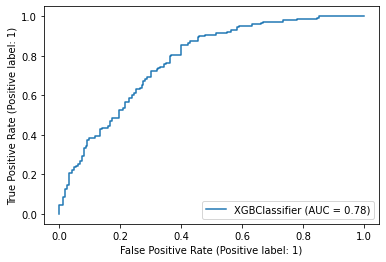

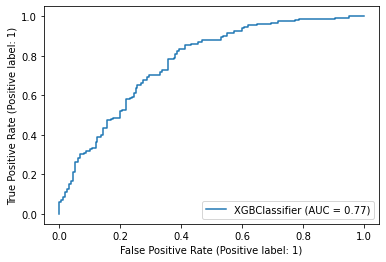

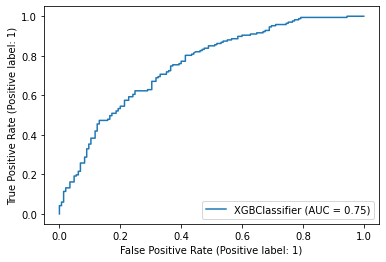

In [29]:
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
	# define the model
	model = XGBClassifier(objective= 'binary:logistic', random_state=42)
	# define search space
	space = dict()
	space['n_estimators'] = [100, 250, 500, 750]
	space['max_depth'] = [3, 5, 10, 15]
	space['learning_rate'] = [0.3, 0.1, 0.01]
	space['colsample_bytree'] = [0.5, 0.8]
	# define search
	search = GridSearchCV(model, space, scoring='roc_auc', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	roc_auc_score = result.best_score_
	print("best auc score is : ")
	print(roc_auc_score)
	best_auc.append(roc_auc_score)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# predict proba
	y_pred_proba = best_model.predict_proba(X_test)
	print(y_pred_proba)    
	predict_prob.append(y_pred_proba)
	# evaluate the model
	acc_on_test = accuracy_score(y_test, yhat)
	print("accuracy on test data: ")
	print(acc_on_test)
	# store the result
	# cm
	cm = confusion_matrix(y_test, yhat)
	# 
	print(cm)
	# class report
	classif_report = classification_report(y_test, yhat)
	print(classif_report)
	#
	RocCurveDisplay.from_estimator(best_model, X_test, y_test)
	# feature_importances_
	f_i = best_model.feature_importances_
	print("feature importances are: ")
	print(f_i)
	feature_imp.append(f_i)
	# best parameters
	print("best parametrs: ")    
	print(result.best_params_)

In [30]:
best_auc

[0.7600114797786786, 0.762999702917579, 0.731171424364566]

In [38]:
round(mean(best_auc),2)

0.75

In [32]:
feature_imp

[array([0.01236836, 0.00972153, 0.01576369, 0.02572064, 0.01112742,
        0.01089138, 0.01273195, 0.01806051, 0.01226619, 0.01171406,
        0.00832008, 0.01880302, 0.        , 0.01435104, 0.01105767,
        0.00924922, 0.00793899, 0.01186079, 0.00934109, 0.01646809,
        0.01832495, 0.01437876, 0.0127694 , 0.01198158, 0.01682097,
        0.011905  , 0.01305276, 0.01724572, 0.02416519, 0.01451263,
        0.01489333, 0.01420251, 0.02014159, 0.01926318, 0.00917078,
        0.01218792, 0.01615247, 0.01591331, 0.02379919, 0.00764957,
        0.01799511, 0.0173579 , 0.01458308, 0.01565764, 0.00838803,
        0.04120709, 0.0214677 , 0.02044042, 0.01354495, 0.02639107,
        0.        , 0.03089209, 0.02699447, 0.02572548, 0.        ,
        0.00676235, 0.04822939, 0.04061607, 0.        , 0.        ,
        0.00505419, 0.        , 0.03178631, 0.03062004], dtype=float32),
 array([0.00915179, 0.0115788 , 0.01174796, 0.02141958, 0.00855803,
        0.02427491, 0.0123374 , 0.00750272,

In [33]:
df_FI_0 = pd.DataFrame(feature_imp[0], columns = ['first'])
df_FI_1 = pd.DataFrame(feature_imp[1], columns = ['second'])
df_FI_2 = pd.DataFrame(feature_imp[2], columns = ['third'])

In [34]:
df_final_FI = pd.concat([df_FI_0, df_FI_1, df_FI_2], axis = 1)

In [35]:
df_final_FI

,first,second,third
0,0.012368,0.009152,0.014561
1,0.009722,0.011579,0.013553
2,0.015764,0.011748,0.017490
3,0.025721,0.021420,0.013833
4,0.011127,0.008558,0.012045
...,...,...,...
59,0.000000,0.000000,0.000000
60,0.005054,0.000000,0.000000
61,0.000000,0.000000,0.000000
62,0.031786,0.034018,0.027995


In [36]:
df_final_FI.to_csv("FI_values_cvd_death_crf_plus_pw.csv")

In [39]:
# pred prob

In [40]:
len(predict_prob)

3

In [41]:
predict_prob

[array([[0.5240475 , 0.47595254],
        [0.2353468 , 0.7646532 ],
        [0.9159578 , 0.08404222],
        [0.89333874, 0.10666126],
        [0.28232855, 0.71767145],
        [0.8280283 , 0.17197168],
        [0.6049118 , 0.39508823],
        [0.7036296 , 0.29637042],
        [0.5607302 , 0.43926975],
        [0.85822695, 0.14177306],
        [0.66004336, 0.33995667],
        [0.18786544, 0.81213456],
        [0.5315782 , 0.46842185],
        [0.93472886, 0.06527113],
        [0.5989181 , 0.40108195],
        [0.6703319 , 0.3296681 ],
        [0.49961853, 0.50038147],
        [0.10828638, 0.8917136 ],
        [0.6591333 , 0.34086668],
        [0.6547004 , 0.34529957],
        [0.704028  , 0.29597202],
        [0.9242089 , 0.0757911 ],
        [0.7049267 , 0.29507327],
        [0.48572117, 0.5142788 ],
        [0.2951433 , 0.7048567 ],
        [0.5606872 , 0.43931282],
        [0.8121235 , 0.18787654],
        [0.65099525, 0.34900478],
        [0.65951395, 0.34048602],
        [0.288

In [42]:
df_predict_0 = pd.DataFrame(predict_prob[0], columns = ['first_0','first_1'])
df_predict_1 = pd.DataFrame(predict_prob[1], columns = ['second_0','second_1'])
df_predict_2 = pd.DataFrame(predict_prob[2], columns = ['third_0','third_1'])

In [43]:
df_final_pred = pd.concat([df_predict_0, df_predict_1, df_predict_2], axis = 1)

In [44]:
df_final_pred

,first_0,first_1,second_0,second_1,third_0,third_1
0,0.524047,0.475953,0.429285,0.570715,0.562890,0.437110
1,0.235347,0.764653,0.488527,0.511473,0.732984,0.267016
2,0.915958,0.084042,0.589538,0.410462,0.595414,0.404586
3,0.893339,0.106661,0.788226,0.211774,0.362003,0.637997
4,0.282329,0.717671,0.723498,0.276502,0.509796,0.490204
...,...,...,...,...,...,...
307,0.597392,0.402608,0.388064,0.611936,0.552938,0.447062
308,0.235105,0.764895,0.251725,0.748275,0.484982,0.515018
309,0.155783,0.844217,0.649269,0.350731,0.500172,0.499828
310,0.115430,0.884570,0.310287,0.689713,0.385188,0.614812


In [45]:
df_final_pred.to_csv("prob_values_cvd_death_crf_plus_pw.csv")

In [46]:
# sensitivity and specificity

In [47]:
# sensitivity for class '0' which is also specificity

In [48]:
sensitivity_class_zero = [0.69, 0.70, 0.70]

In [49]:
print("sensitivity of class zero: ", round(mean(sensitivity_class_zero),2))

sensitivity of class zero:  0.7


In [50]:
# sensitivity for class one

In [51]:
sensitivity_class_one = [0.72, 0.70, 0.65]

In [52]:
print("sensitivity of class one: ", round(mean(sensitivity_class_one),2))

sensitivity of class one:  0.69


In [1]:
# Getting AUC from outer loop, average over 3 folds

In [3]:
auc_outer_loop = [0.78, 0.77, 0.75]

In [4]:
auc_outer_loop_mean = round(mean(auc_outer_loop),2)

In [5]:
print(auc_outer_loop_mean)

0.77
